In [44]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# First Try with Segmentation API

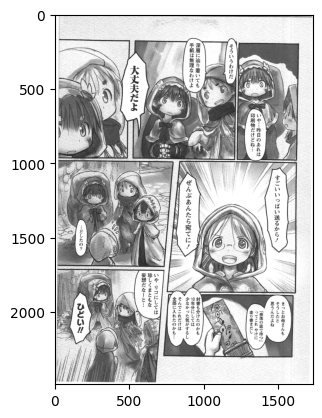

In [72]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)

IMAGE_PATH = os.path.join('..', 'data', 'Made in Abyss v01-20240306T135857Z-001', 'Made in Abyss v01', 'CCF_0148.jpg')
img = np.asarray(Image.open(IMAGE_PATH))
plt.imshow(img, cmap='grey')

In [44]:
img.shape

(2485, 1735)

In [45]:
# infer on a local image
result = CLIENT.infer(IMAGE_PATH, model_id="manga-text-detection/2")

In [46]:
result

{'time': 0.2616140509999241,
 'image': {'width': 1735, 'height': 2485},
 'predictions': [{'x': 1483.96240234375,
   'y': 1314.08935546875,
   'width': 172.2998046875,
   'height': 579.9951171875,
   'confidence': 0.9827433824539185,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '35f9d71b-4a77-4fb7-b186-fa1fb665348b'},
  {'x': 894.26025390625,
   'y': 1349.27734375,
   'width': 182.0068359375,
   'height': 567.861328125,
   'confidence': 0.974861741065979,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '990b6f79-ec32-4b46-a3e6-580f06fbd495'},
  {'x': 627.31689453125,
   'y': 1884.37744140625,
   'width': 196.5673828125,
   'height': 337.3193359375,
   'confidence': 0.9745863676071167,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': 'd0fcf9a6-b6c2-433e-a890-176e9033d922'},
  {'x': 167.4462890625,
   'y': 2043.330078125,
   'width': 145.60546875,
   'height': 349.453125,
   'confidence': 0.9642037153244019,
   'class': 'text_bubble',
   '

In [73]:
x = round(result['predictions'][0]['x'])
y = round(result['predictions'][0]['y'])
height = round(result['predictions'][0]['height'])
width = round(result['predictions'][0]['width'])

x, y, height, width

(1484, 1314, 580, 172)

In [74]:
img_text = img[y-round(height/2):y+round(height/2), x-round(width/2):x+round(width/2)]

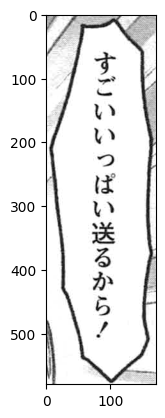

In [75]:
plt.imshow(img_text, cmap='grey')

# All Data Import

Importar imágenes de carpeta de Manga para obtener las burbujas

In [53]:
DATA_DIR = os.path.join('..', 'data', 'Made in Abyss v01-20240306T135857Z-001', 'Made in Abyss v01')
data_pictures = [elem for elem in os.listdir(DATA_DIR) if ':Zone.Identifier' not in elem]

In [63]:
data = []


for img in data_pictures:

    # Get path and img in num format
    path = os.path.join(DATA_DIR, img)
    img_ = np.asarray(Image.open(path))

    # Get API predictions of text cuts
    results = CLIENT.infer(path, model_id="manga-text-detection/2")['predictions']

    text_bubbles = []

    # Extract each bubble
    for prediction in results:

        if prediction['class'] == 'text_bubble':

            # Use relevant data
            x = round(prediction['x'])
            y = round(prediction['y'])
            height = round(prediction['height'])
            width = round(prediction['width'])

            img_text = img_[y-round(height/2):y+round(height/2), x-round(width/2):x+round(width/2)]
            text_bubbles.append(img_text)

    data.append(text_bubbles)

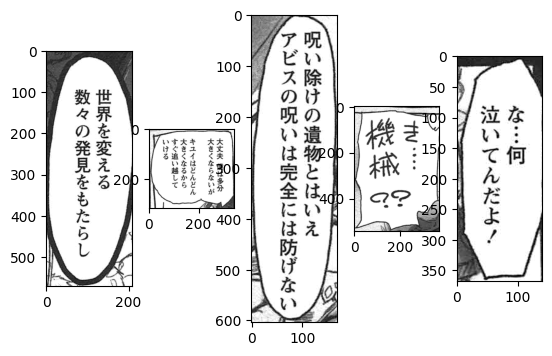

In [77]:
fig, axes = plt.subplots(1, 5)

for i in range (5):
    axes[i].imshow(data[i][0], cmap='grey')

## burbuja --> burbuja reescalada
## set de burbujas --> set de burbukas reescaladas

In [83]:
ind_bubbles = [bubble for elem in data for bubble in elem]

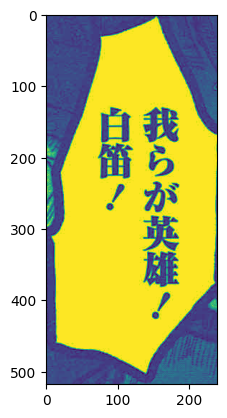

In [88]:
plt.imshow(ind_bubbles[2])

# CNN Model for Text Recognition

OCR for japanise language

INPUT: Bubble image of text (manga)

OUTPUT: Text characters

### Convolutional Neural Network Structure
To enhanced the predictive power of the CNN, various network structure have been implemented, in additional to some classical CNN layers. Within this CNN model to recognize Japanese character, there are five types of layers:

- **Convolutional Layer**: the main parameters are filter width, filter height and number of filters
- **Pooling Layer**: the main parameters are pooling width and pooling height
- **Flatten Layer**: no parameter
- **Dense Layer**: the main parameter are number of nodes.
- **Residual Block**: taken idea from this paper by He. & Zhang. The main parameters are width and height of the inside Convolutional layer
- **Inception Layer**: taken idea from this paper by Szegedy. The main parameters are size of the one by one layer, a list of tuples for the inside Convolutional Layer: list of tuple [(filter_h,filter_w,n_filters),...]

#### Import DataSet

In [7]:
from xml.etree import ElementTree as ET
import os

PATH = os.path.join('..', 'data', 'Manga109s', 'Manga109s_released_2023_12_07', 'annotations')

tree = ET.parse(os.path.join(PATH, 'AisazuNihaIrarenai.xml'))
root = tree.getroot()

In [32]:
data = []

for i, pages in enumerate(root[1]):

    page = {}
    page['page'] = i

    bubbles = []

    for elem in pages:

        if elem.tag == 'text':

            info = elem.attrib
            info['text'] = elem.text

            bubbles.append(info)

    page['bubbles'] = bubbles

    data.append(page)

In [36]:
IMAGES_PATH = os.path.join('..', 'data', 'Manga109s', 'Manga109s_released_2023_12_07', 'images', 'AisazuNihaIrarenai')

pages = []

for i in range (94):

    if i <= 9:
        pages.append(f'00{i}.jpg')
    else:
        pages.append(f'0{i}.jpg')

In [46]:
import numpy as np

images = []

for img, info in zip(pages, data):

    # Get path and img in num format
    path = os.path.join(IMAGES_PATH, img)
    img_ = np.asarray(Image.open(path))

    images.append(img_)

In [56]:
random_img = images[3]
random_info = data[3]

In [59]:
random_info['bubbles'][2]

{'id': '000009b3',
 'xmin': '1417',
 'ymin': '93',
 'xmax': '1543',
 'ymax': '211',
 'text': 'あたしだって実家にいた時はつくづく万事を母さんにまかせきりだったのね'}

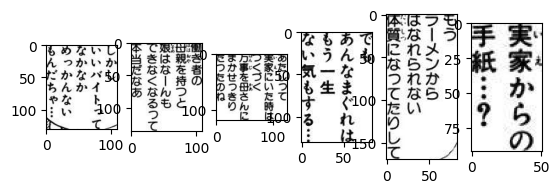

In [63]:
img, axs = plt.subplots(1, 6)

for i, bubble in enumerate(random_info['bubbles'][:6]):

    xmin = int(bubble['xmin'])
    xmax = int(bubble['xmax'])
    ymin = int(bubble['ymin'])
    ymax = int(bubble['ymax'])

    axs[i].imshow(random_img[ymin:ymax, xmin:xmax])

#### Define X_raw (bubbles) and y

In [114]:
X_raw = []
y = []

for page in data:

    for bubble in page['bubbles']:

        xmin = int(bubble['xmin'])
        xmax = int(bubble['xmax'])
        ymin = int(bubble['ymin'])
        ymax = int(bubble['ymax'])

        X_raw.append(random_img[ymin:ymax, xmin:xmax])
        y.append(bubble['text'])

#### Preprocess X_raw

In [115]:
# from moji.plotsegments import

len(X_raw), len(y)

X_raw[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  8,   8,   8],
        [ 74,  74,  74],
        [255, 255, 255],
        ...,
        [240, 240, 240],
        [171, 171, 171],
        [143, 143, 143]],

       [[ 65,  65,  65],
        [ 31,  31,  31],
        [180, 180, 180],
        ...,
        [104, 104, 104],
        [248, 248, 248],
        [241, 241, 241]],

       [[ 19,  19,  19],
        [ 12,  12,  12],
        [ 46,  46,  46],
        ...,
        [202, 202, 202],
        [207, 207, 207],
        [227, 227, 227]]

In [110]:
import matplotlib.patches as patches
from PIL import Image

def preprocess_image(bubble, target_size=(100, 100)):

    bubble_image = Image.fromarray(bubble, 'RGB')

    # Convierte la imagen recortada a escala de grises
    crop_img_gray = bubble_image.convert('L')

    # Redimensiona la imagen recortada sin deformar (manteniendo el aspecto original)
    crop_img_gray.thumbnail(target_size, Image.LANCZOS)

    # Crea una matriz de relleno verde
    green_fill = np.full((target_size[1], target_size[0], 3), 0, dtype=np.uint8)

    # Obtén las coordenadas para insertar la imagen recortada en el centro del área de relleno verde
    top_left_x = (target_size[0] - crop_img_gray.width) // 2
    top_left_y = (target_size[1] - crop_img_gray.height) // 2

    # Inserta la imagen recortada en el área de relleno verde
    green_fill[top_left_y:top_left_y + crop_img_gray.height, top_left_x:top_left_x + crop_img_gray.width, 1] = np.array(crop_img_gray)

    # Muestra la imagen recortada y redimensionada en escala de grises con relleno verde en el subgráfico
    bubble_return = np.asarray(green_fill)

    return bubble_return

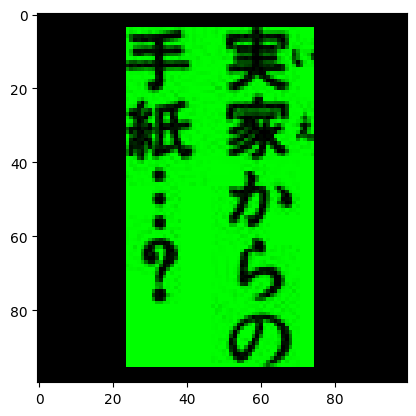